# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 12 - Random Forest**
---

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ======================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ===============================
from tqdm import tqdm

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración warnings
# =======================
import warnings
warnings.filterwarnings('once')

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).  
En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:  
- Ajustar el modelo a un Random Forest  
- Extraer las métricas  
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)  

### 1. Primer modelo

In [2]:
# cargamos el dataset
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
country,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.285714,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.383060,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.214286,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


In [3]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'region', 'restaurant_price_index'], axis = 1)
y = df["restaurant_price_index_normal"]

In [4]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# creamos un diccionario con los hiperparámetros que queremos probar, los mismos que en el decisin tree
param = {"max_depth": [2, 4, 6], 
        "max_features": [1, 2, 3, 4],
        "min_samples_split": [10, 15, 20],
        "min_samples_leaf": [10, 15, 20],
        "random_state": [99]} 

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [7]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [99]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [8]:
# sacamos cual es nuestro mejor bosque
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=2, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=99)

In [ ]:
# dibujemos los árboles de nuestro bosque
for arbol in tqdm(bosque.estimators_):
    fig = plt.figure(figsize=(40, 20))
    tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    plt.show()

In [9]:
# realizamos las predicciones
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [10]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados
rf_results = spf.metricas_rlin(y_test, y_pred_test_rf, y_train, y_pred_train_rf, "Random Forest I")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I


El valor del `R2` es superior a 0,7 tanto en train como en test. Además, las métricas del train son mejores que las del test pero estando la diferencia entre ambos `R2` muy por debajo de 0.1 (0.009), por lo que no tendríamos ni underfitting ni overfitting, sino un ajuste adecuado. Por lo tanto, los datos sugieren que es un modelo adecuado. 

In [11]:
# cargamos el csv con todos los resultados que guardamos en el jupyter anterior
df_LR_DT_results = pd.read_csv("datos/soci_econ_country_profiles_metricas_DT.csv", index_col = 0)
df_LR_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.152388,0.033504,0.183042,0.893973,test,Regresion Lineal-todas VP
1,0.122108,0.023193,0.152293,0.937150,train,Regresion Lineal-todas VP
0,0.200250,0.055088,0.234708,0.784729,test,Regresion Lineal-ANOVA
1,0.145096,0.033317,0.182530,0.913886,train,Regresion Lineal-ANOVA
0,0.138299,0.026285,0.162125,0.916820,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


In [12]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo
df_todos_resultados = pd.concat([rf_results, df_LR_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I
0,0.152388,0.033504,0.183042,0.893973,test,Regresion Lineal-todas VP
1,0.122108,0.023193,0.152293,0.937150,train,Regresion Lineal-todas VP
0,0.200250,0.055088,0.234708,0.784729,test,Regresion Lineal-ANOVA
1,0.145096,0.033317,0.182530,0.913886,train,Regresion Lineal-ANOVA
0,0.138299,0.026285,0.162125,0.916820,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I
0,0.188243,0.055945,0.236526,0.822958,test,Decision Tree II
1,0.251930,0.101996,0.319369,0.723602,train,Decision Tree II


Si comparamos todos los modelos que tenemos hasta ahora, vemos que con bastante diferencia el mejor es el primero `Regresion Lineal-todas VP`, el cual tiene en general buenas métricas, ya que `R2` es alto (un 89% en el test), por lo que el 89% de la VR se explica por nuestras VPs. Los datos sugieren que este modelo se ajusta correctamente a los datos reales. Aunque el `R2` de train sea más alto que el `R2` de test, la diferenia es despreciable. Además, los valores de `MAE`, `MSE` y `RMSE` de train son ligeramente más bajos de los de test, es decir, no tanto como para considerar que el modelo esté sobreajustado. No obstante, este modelo no cumplía las asunciones para una reagresión lineal, por lo que en una situación real habría que descartarlo (de hecho ni siquiera se hubiera llevado a cabo).

En tal caso, nos quedaríamos con el `Random Forest I` por ahora.

In [27]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras = pd.DataFrame({'variable predictora': x_train.columns,
                                            'importancia': bosque.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("------------------------------------------------------")
importancia_predictoras

Importancia de las variables predictoras en el modelo
------------------------------------------------------


,variable predictora,importancia
8,cost_of_living,0.252826
3,employment_services,0.185771
16,region_map,0.100482
15,international_migrant_stock,0.097393
1,employment_agriculture,0.092974
6,purchasing_power_index,0.069290
10,human_capital_index,0.059538
12,urban_population,0.056016
2,employment_industry,0.039401
9,consumer_price_index,0.019238


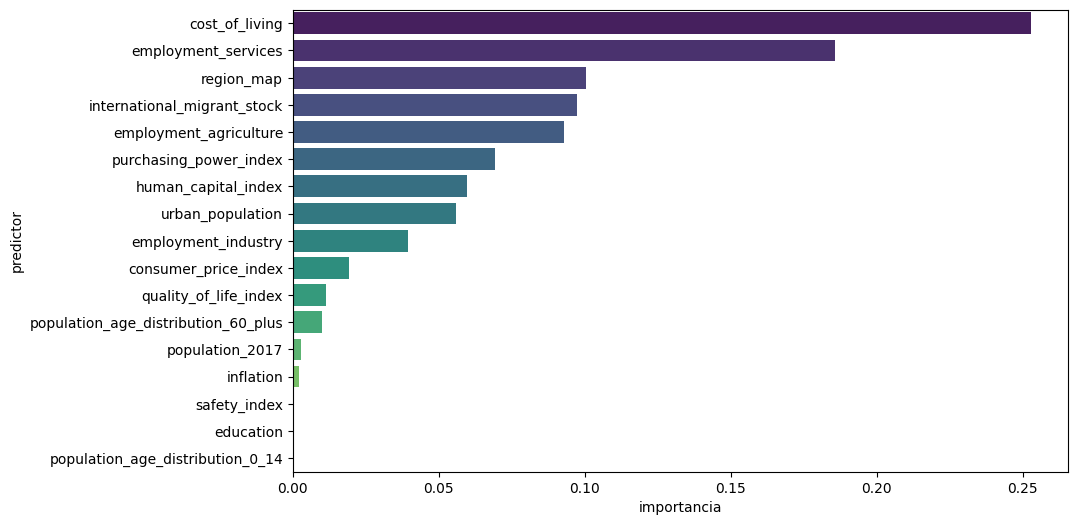

In [14]:
# ploteamos las variables predictoras ordenadas por importancia. 
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras, palette="viridis");
plt.show()

### 2. Segundo modelo

In [15]:
# probamos otro modelo
param2 = {"max_depth": [2,4, 6], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 15, 20],
        "min_samples_leaf": [10, 15, 20],
        "random_state": [98]} 

In [16]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param2,
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error")

In [17]:
# ajustamos el modelo que acabamos de definir en el GridSearch
gs_rf2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [98]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [18]:
# al igual que el decision tree podemos sacar cual es nuestro mejor bosque
# En este caso,  nuestro mejor bosque es aquel que esta formado por arboles de 6 de profundidad, usa 4 variables y que tiene  un min_samples_leaf y un min_samples_split de 10. 
bosque2 = gs_rf2.best_estimator_
bosque2

RandomForestRegressor(max_depth=2, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=98)

In [ ]:
# dibujemos los árboles de nuestro bosque
for arbol in tqdm(bosque2.estimators_):
    fig = plt.figure(figsize=(40, 20))
    tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    plt.show()

In [19]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [20]:
rf_results2 = spf.metricas_rlin(y_test, y_pred_test_rf2, y_train, y_pred_train_rf2, "Random Forest II")
rf_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.205582,0.069687,0.263982,0.779471,test,Random Forest II
1,0.235053,0.085227,0.291936,0.769046,train,Random Forest II


El valor del `R2` es superior a 0,7 tanto en train como en test. Además, las métricas del train son mejores que las del test pero estando la diferencia entre ambos `R2` muy por debajo de 0.1 (0.01), por lo que no tendríamos ni underfitting ni overfitting, sino un ajuste adecuado. Por lo tanto, los datos sugieren que es un modelo adecuado. 

In [21]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo
df_todos_resultados = pd.concat([rf_results2, df_todos_resultados], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.205582,0.069687,0.263982,0.779471,test,Random Forest II
1,0.235053,0.085227,0.291936,0.769046,train,Random Forest II
0,0.201870,0.066661,0.258188,0.789045,test,Random Forest I
1,0.225425,0.081228,0.285005,0.779882,train,Random Forest I
0,0.152388,0.033504,0.183042,0.893973,test,Regresion Lineal-todas VP
1,0.122108,0.023193,0.152293,0.937150,train,Regresion Lineal-todas VP
0,0.200250,0.055088,0.234708,0.784729,test,Regresion Lineal-ANOVA
1,0.145096,0.033317,0.182530,0.913886,train,Regresion Lineal-ANOVA
0,0.138299,0.026285,0.162125,0.916820,test,Decision Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decision Tree I


CONCLUSIÓN:
- Los datos sugieren que el modelo más adecuado es Random Forest I por las siguientes razones:
    - El `R2` del `Decision tree II` para el test es mayor pero la diferencia respecto al `R2` del train es considerablemente superior a la de los modelos `Random Forest I y II`. Además, los valores de los residuos del train de `Decision Tree II` son mayores que los otros modelos.
    - Las métricas de los dos modelos de Random Forest son bastante buenas (residuos bajos y `R2` superiores a 0.7) y muy parecidas. Ambos podrían ser adecuados y más estables que el de `Decision Tree II`, ya que tienen muy poca diferencia entre las métricas de train y de test.
    - Las métricas del modelo `Random Forest I` son ligeramente mejores (`R2` mayor y residuos menores) que las de `Random Forest II`, por lo que los datos sugieren que sería el mejor modelo de los realizados. 
    - En lo que respecta el modelo de `Regresión Lineal-todas VP`, auque tengamos métricas mejores que en todos los demás modelos, no lo podemos tener en consideración porque no hemos cumplido ninguna de las asunciones.

In [26]:
# crearnos un dataframe con la importancia de las predictoras
importancia_predictoras2 = pd.DataFrame({'variable predictora': x_train.columns,
                                            'importancia': bosque2.feature_importances_})
# ordenamos de mayor a menor los resultados
importancia_predictoras2.sort_values(by=["importancia"], ascending=False, inplace = True)
# printeamos los resultados
print("Importancia de las variables predictoras en el modelo")
print("------------------------------------------------------")
importancia_predictoras2

Importancia de las variables predictoras en el modelo
------------------------------------------------------


,variable predictora,importancia
3,employment_services,0.221627
1,employment_agriculture,0.164358
8,cost_of_living,0.151302
15,international_migrant_stock,0.143708
16,region_map,0.103532
5,quality_of_life_index,0.056152
6,purchasing_power_index,0.049023
10,human_capital_index,0.034568
11,inflation,0.018998
4,education,0.015276


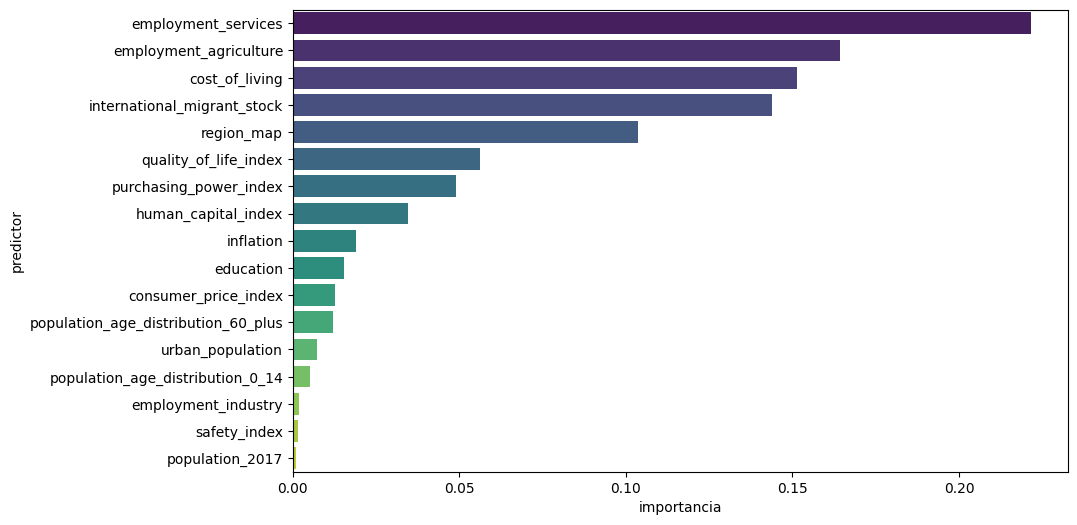

In [23]:
# ploteamos las variables predictoras ordenadas por importancia. 
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "variable predictora", data = importancia_predictoras2, palette="viridis");
plt.show()

Si analizamos la importancia de las variables en ambos modelos de tipo Random Forest cabe destacar que, a pesar de tener métricas muy similares, hay mucha variación entre la importancia de las variables en uno y otro modelo, tanto entre las más importantes (`cost of living` por ejemplo) como entre las menos importantes (`education` por ejemplo).  

Siguiendo con estos ejemplos:
- `cost of living` pasa del primer puesto con una importancia = 0.25 al tercer puesto con una importancia = 0.15.
- `education` pasa del decimosexto lugar con una importancia = 0 al décimo lugar, por encima de otras 7 variables con importancia > 0.